In [4]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
sns.set_style("darkgrid")

In [6]:
#Import CSV
merged_csv = os.path.join("..", "data", "cleandata", "coll_n_weather_chris_stan_date_left_merge.csv")
csv = pd.read_csv(merged_csv, low_memory=False)

In [7]:
df = pd.DataFrame(csv)
df = df.sort_values('DATE', ascending=True)
df.columns

Index(['DATE', 'UNIX DATE', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'BOROUGH',
       'DEATHS', 'INJURIES', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Day', 'Detail', 'Moonphase', 'Summary', 'Sunrise', 'Sunset',
       'cloudCover', 'dewPoint', 'humidity', 'precipIntensity',
       'precipIntensityMax', 'precipProbability', 'pressure', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime',
       'visibility', 'windGust', 'windGustTime', 'windSpeed'],
      dtype='object')

In [8]:
df.head(10)

,DATE,UNIX DATE,HOUR,DAY,MONTH,YEAR,BOROUGH,DEATHS,INJURIES,ZIP CODE,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
1116398,2013-12-31,1388483880,9,Tuesday,12,2013,BROOKLYN,0.0,0,11219,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116081,2013-12-31,1388499660,14,Tuesday,12,2013,NaN,0.0,1,NaN,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116082,2013-12-31,1388499900,14,Tuesday,12,2013,BROOKLYN,0.0,0,11225,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116083,2013-12-31,1388499900,14,Tuesday,12,2013,QUEENS,0.0,0,11420,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116084,2013-12-31,1388499900,14,Tuesday,12,2013,NaN,0.0,0,NaN,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116085,2013-12-31,1388499900,14,Tuesday,12,2013,BROOKLYN,0.0,1,11226,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116086,2013-12-31,1388499900,14,Tuesday,12,2013,NaN,0.0,1,NaN,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116087,2013-12-31,1388500200,14,Tuesday,12,2013,BRONX,0.0,0,10451,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116088,2013-12-31,1388500200,14,Tuesday,12,2013,BRONX,0.0,0,10472,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1116089,2013-12-31,1388500200,14,Tuesday,12,2013,BRONX,0.0,0,10475,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76


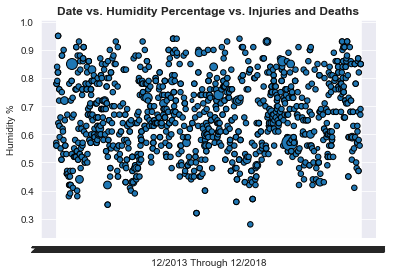

In [9]:
#Create Scatter Plot X=Date, Y=Humidity, s=injruries + Deaths
plt.scatter(df['DATE'], df['humidity'],s=df['DEATHS']*15, edgecolor="black")
plt.title(f'Date vs. Humidity Percentage vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('12/2013 Through 12/2018')
plt.ylabel('Humidity %')
#save figure
plt.savefig(os.path.join('..', 'reports', 'figures', 'humidityvsdeaths.png'))
#show figure
plt.show()

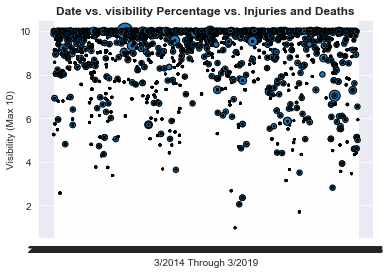

In [24]:
plt.scatter(df['DATE'], df['visibility'],s=df['DEATHS']*15, edgecolor="black")
plt.title(f'Date vs. visibility Percentage vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('12/2013 Through 12/2018')
plt.ylabel('Visibility (Max 10)')
#save figure
plt.savefig(os.path.join('..', 'reports', 'figures', 'visibilityvsdeaths.png'))
#show figure
plt.show()

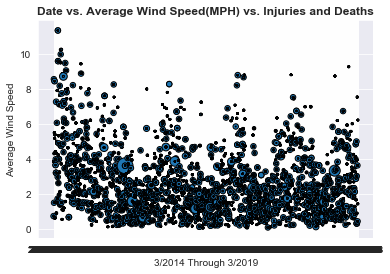

In [27]:
plt.scatter(df['DATE'], df['windSpeed'],s=df['INJURIES']+df['DEATHS']*15, edgecolor="black")
plt.title(f'Date vs. Average Wind Speed(MPH) vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('12/2013 Through 12/2018')
plt.ylabel('Average Wind Speed')
#save figure
plt.savefig(os.path.join('..', 'reports', 'figures', 'windspeedvsdeaths.png'))
#show figure
plt.show()

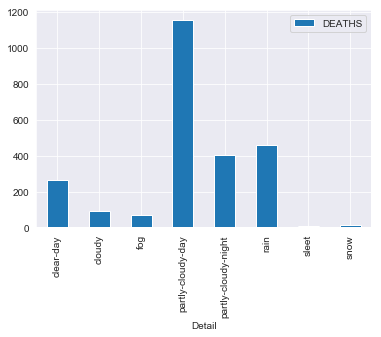

In [114]:
weather_total = df.groupby("Detail")['Detail', 'DEATHS'].sum()
weather_total.plot.bar()
plt.show()